# <center>CSE3024 Lab 6: Web Documents Classification - Naïve Bayes Classifier</center>
<h3 align="right">Faraz Suhail</h3> 
<h3 align="right">19BCE1525</h3> 

## Ques 1.	Write a Naïve Bayes Classifier in python without using any direct ML package for the following datasets (1) and (2).


## 1.	Dataset of Restaurant customer reviews. 

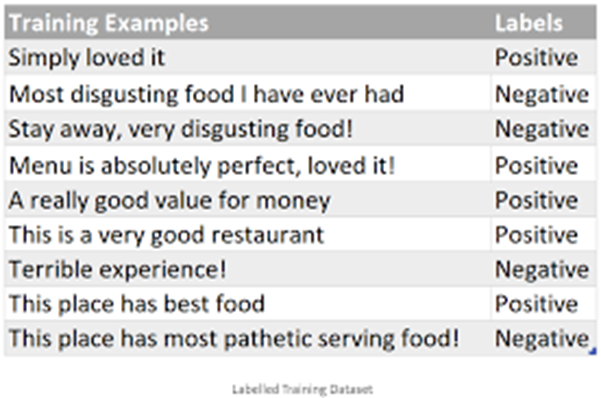

Identify the label -> Positive or Negative of the following query by applying NB classifer with Laplace smoothing

Test_data 1= Serving good Food absolutely perfect Restaurant

Test_data 2= pathetic food ever had


In [1]:
from enum import unique
import pandas as pd
import numpy as np
import re

all_words = []
word_size_class = {}
all_sents = []
word_frequency_label = {}

In [2]:
def load_data(filename):
    data = pd.read_excel(filename)
    test_index = data['Class'] == '?'
    training_data = data[-test_index]
    testing_data = data[test_index]   
    testing_data.reset_index(inplace = True, drop = True) 
    return (training_data,testing_data)

In [3]:
def find_vocab_size(training_data):

    for index,sent in enumerate(training_data['URL']):
        ext_words = re.findall(r"([a-z0-9]+)",sent)
        label = training_data['Class'][index]
        word_size_class[label] = word_size_class.get(label,0) + len(ext_words)
        all_words.extend(ext_words)
        all_sents.append(ext_words)
    
    unique_words_count = len(set(all_words))
    all_words_count = len(all_words)

    global unique_words
    unique_words = list(set(all_words))

    return (unique_words_count,all_words_count)

In [4]:
def find_prior_probabilties(training_data):  
    class_prior = {}
    labels = training_data['Class'].unique()   
    total = len(training_data)
    for l in labels:
        class_prior[l] = sum(training_data['Class'] == l) / total
    return class_prior

def find_word_frequency_class(training_data):   
    for word in unique_words:
        for index,sent_vec in enumerate(all_sents):
            if word in sent_vec:          
                if word not in word_frequency_label:
                    word_frequency_label[word] = {}
                label = training_data['Class'][index]
                word_frequency_label[word][label] = word_frequency_label[word].get(label,0) + sent_vec.count(word) 

In [5]:
def display_conditional_prob(vocab_size,labels):
    i=0
    for word in word_frequency_label:        
        for label in labels:
            num = word_frequency_label[word].get(label,0) + 1
            denom = word_size_class[label] + vocab_size
            space = " "
            print(f"P({word}/{label}) = {num}/{denom} {space*(14-len(word))}",end="\t")
        print()   
        
def display_test_results(data,labels,vocab_size,class_prior):
    for i,sent in enumerate(data['URL']):
        ext_words = re.findall(r"([a-z0-9]+)",sent)       
        probs = []
        for label in labels:
            prob = 1
            for word in ext_words:               
                class_dict = word_frequency_label.get(word)                
                num = 0
                denom = (word_size_class[label]+vocab_size)
                if class_dict == None:
                    num = 1
                else:                    
                    num = class_dict.get(label,0) + 1
                prob *= (num/denom) 
            prior = class_prior[label]
            probs.append(prior*prob)        
        probs = np.array(probs, dtype=np.float32)
        index = np.argmax(probs)
        print(f"\n{sent} ===> {labels[index]}  {probs}")
        data['Class'][i] = labels[index]   
    print("\nFinal Result is as follows :")
    print(f"{data}\n")

In [6]:
train_file = "lab6q1_train.xlsx"
test_file = "lab6q1_test.xlsx"

train_data,_ = load_data(train_file)
test_data = pd.DataFrame({'URL': ['Serving good Food absolutely perfect Restaurant', 'pathetic food ever had'], 'Class': ['?', '?']})

print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)

Training Data:
                                    URL     Class
0                       simply-loved-it  Positive
1  most-disgusting-food-i-have-ever-had  Negative
2        stay-away-very-disgusting-food  Negative
3   menu-is-absolutely-perfect-loved-it  Positive
4         a-really-good-value-for-money  Positive
5        this-is-a-very-good-restaurant  Positive
6                   terrible-experience  Negative
7              this-place-has-best-food  Positive
8  this-place-has-pathetic-food-serving  Negative

Testing Data:
                                               URL Class
0  Serving good Food absolutely perfect Restaurant     ?
1                           pathetic food ever had     ?


In [7]:
labels = train_data['Class'].unique()

class_prior = find_prior_probabilties(train_data)
print(f"Prior Probabilities: {class_prior}\n")

vocab_size, total_word_count = find_vocab_size(train_data)
print(f"Vocabulary size: {vocab_size}")
print(f"Total words in train data: {total_word_count}\n")

Prior Probabilities: {'Positive': 0.5555555555555556, 'Negative': 0.4444444444444444}

Vocabulary size: 32
Total words in train data: 46



In [8]:
find_word_frequency_class(train_data)
print("Formed a dictionary of words with respect to their frequency and class")
print('\nThe conditional Probabilities are as follows :')
display_conditional_prob(vocab_size,labels)

Formed a dictionary of words with respect to their frequency and class

The conditional Probabilities are as follows :
P(away/Positive) = 1/58           	P(away/Negative) = 2/52           	
P(really/Positive) = 2/58         	P(really/Negative) = 1/52         	
P(for/Positive) = 2/58            	P(for/Negative) = 1/52            	
P(this/Positive) = 3/58           	P(this/Negative) = 2/52           	
P(a/Positive) = 3/58              	P(a/Negative) = 1/52              	
P(ever/Positive) = 1/58           	P(ever/Negative) = 2/52           	
P(perfect/Positive) = 2/58        	P(perfect/Negative) = 1/52        	
P(experience/Positive) = 1/58     	P(experience/Negative) = 2/52     	
P(absolutely/Positive) = 2/58     	P(absolutely/Negative) = 1/52     	
P(very/Positive) = 2/58           	P(very/Negative) = 2/52           	
P(best/Positive) = 2/58           	P(best/Negative) = 1/52           	
P(serving/Positive) = 1/58        	P(serving/Negative) = 2/52        	
P(disgusting/Positive) = 1/58

In [9]:
print("\nThe result on test sentences are as follows :")
display_test_results(test_data,labels,vocab_size,class_prior)


The result on test sentences are as follows :

Serving good Food absolutely perfect Restaurant ===> Positive  [1.7512203e-10 2.2480058e-11]

pathetic food ever had ===> Negative  [9.8185083e-08 1.9451545e-06]

Final Result is as follows :
                                               URL     Class
0  Serving good Food absolutely perfect Restaurant  Positive
1                           pathetic food ever had  Negative



## Q2.	The dataset . Create your own dataset as [Data.csv](./Data.csv) file
 
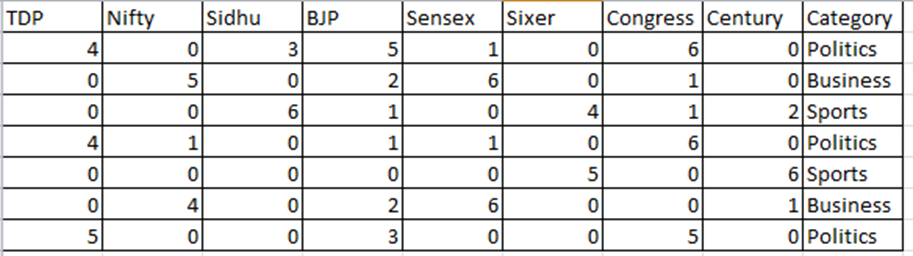

Identify the class/category -- Politics or Business or Sports - of the following query by applying NB classifer with Laplace smoothing

(i)	query_data = [4,0,2,0,1,0,6,0] 
(ii)	query_data = [0,0,2,0,0 ,9,0,9] 
(iii)	query_data = [5,0,2,5,0 ,9,0,9] 



In [10]:
import csv
def strings(row,count):
  str1=""
  result_arr = ['Politics','Business','Sports','Politics','Sports','Business','Politics','?','?','?']
  arr = []
  fields = ['TDP','Nifty','Sidhu','BJP','Sensex','Sixer','Congress','Century']
  for i in range(0,8):
    temp = row[i];
    temp1 = int(temp)
    for j in range(0,temp1):
      str1 = str1 + " " + fields[i]  
  arr.append(str1)
  arr.append(result_arr[count])
  return arr

In [11]:
filename = "lab6q2.csv"
fields = []
class_arr = ['Politics','Business','Sports','Politics','Sports','Business','Politics','?','?','?']
rows = []
mini_data = []
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for k,row in enumerate(csvreader):
        rows.append(row)
        #print(row)
        tempo = strings(row,k)
        mini_data.append(tempo)
for i in mini_data:
  print(i)     

[' TDP TDP TDP TDP Sidhu Sidhu Sidhu BJP BJP BJP BJP BJP Sensex Congress Congress Congress Congress Congress Congress', 'Politics']
[' Nifty Nifty Nifty Nifty Nifty BJP BJP Sensex Sensex Sensex Sensex Sensex Sensex Congress', 'Business']
[' Sidhu Sidhu Sidhu Sidhu Sidhu Sidhu BJP Sixer Sixer Sixer Sixer Congress Century Century', 'Sports']
[' TDP TDP TDP TDP Nifty BJP Sensex Congress Congress Congress Congress Congress Congress', 'Politics']
[' Sixer Sixer Sixer Sixer Sixer Century Century Century Century Century Century', 'Sports']
[' Nifty Nifty Nifty Nifty BJP BJP Sensex Sensex Sensex Sensex Sensex Sensex Century', 'Business']
[' TDP TDP TDP TDP TDP BJP BJP BJP Congress Congress Congress Congress Congress', 'Politics']
